In [1]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv('delivery_time.csv')
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
# Data description
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
# EDA and visualization

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

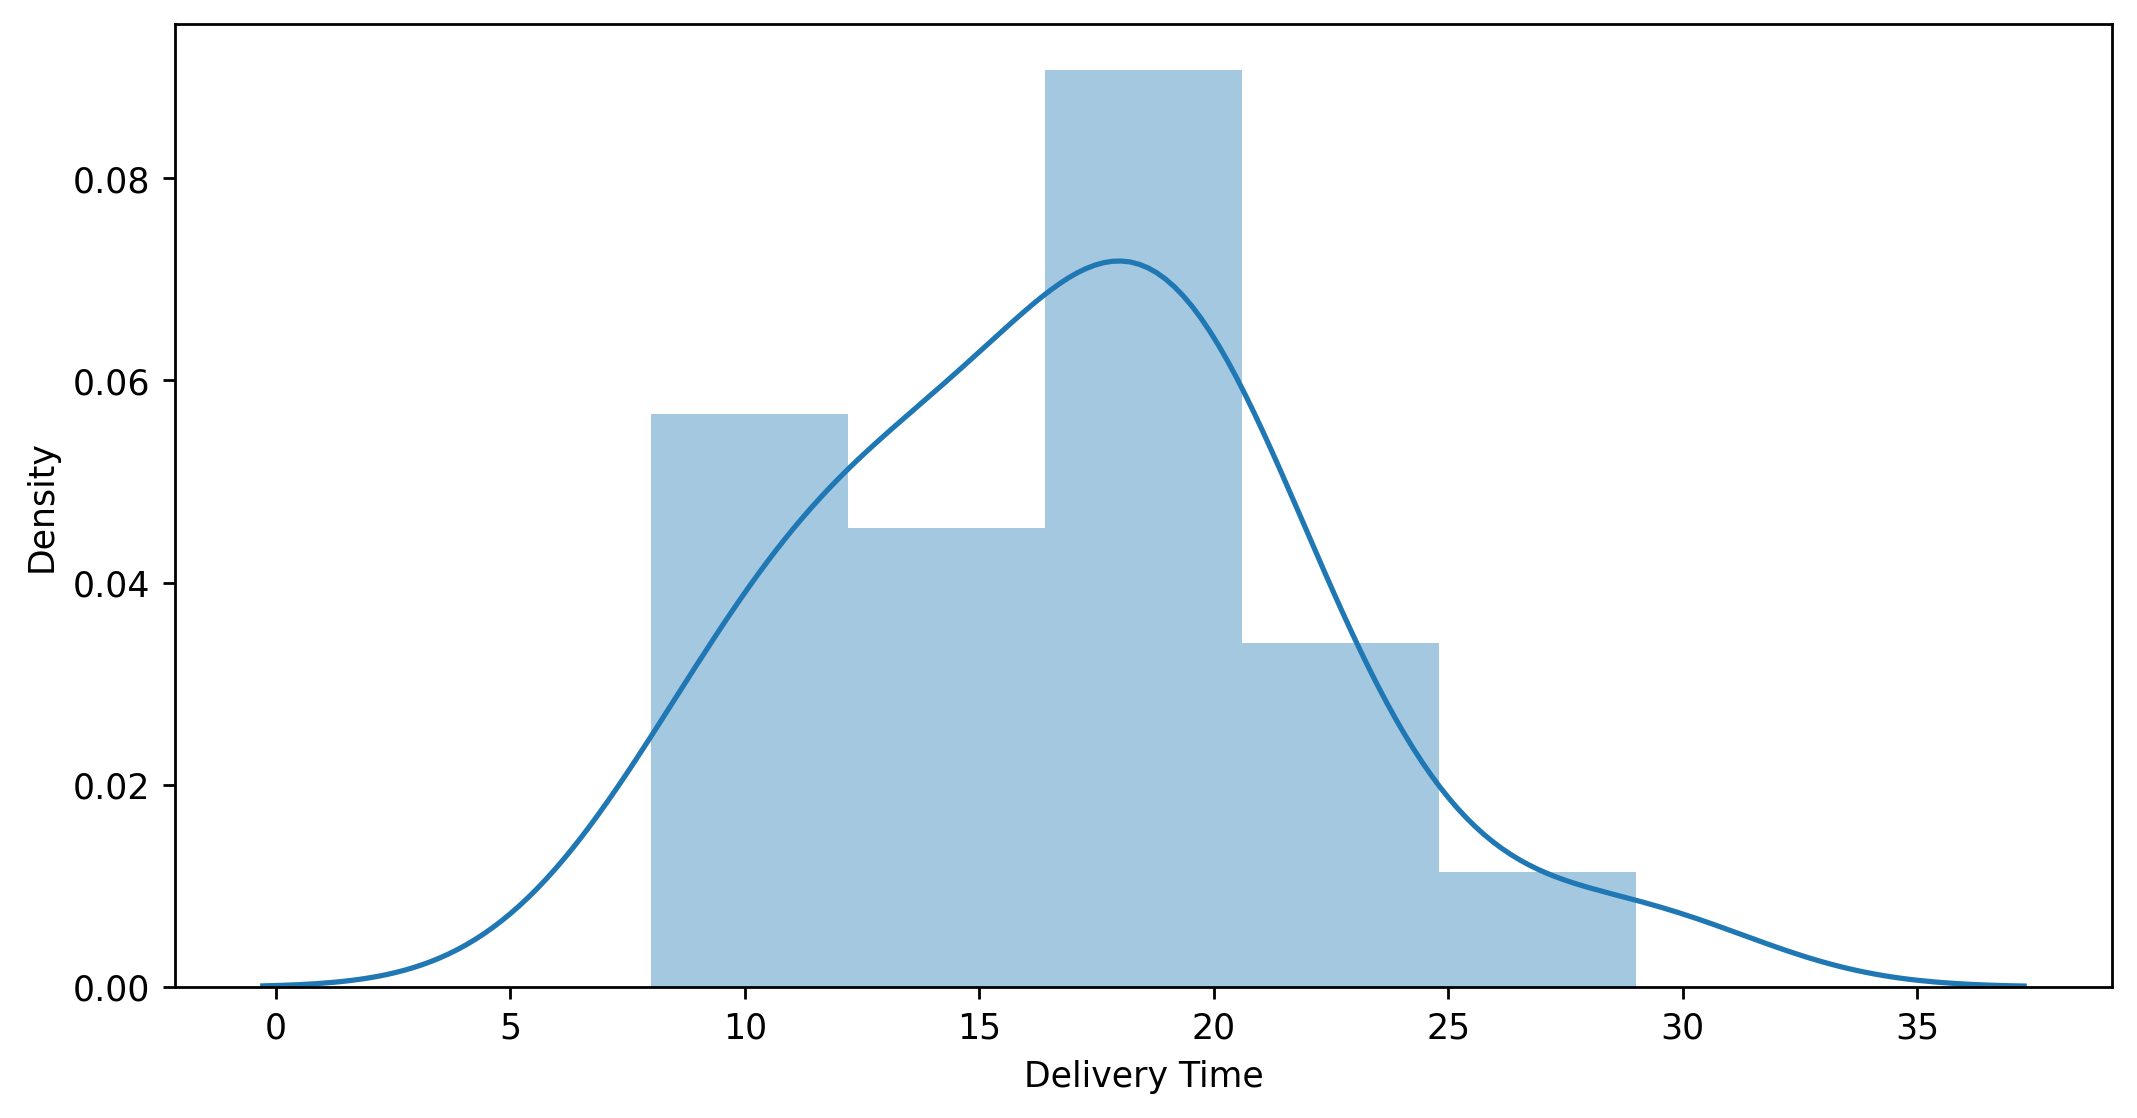

In [6]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

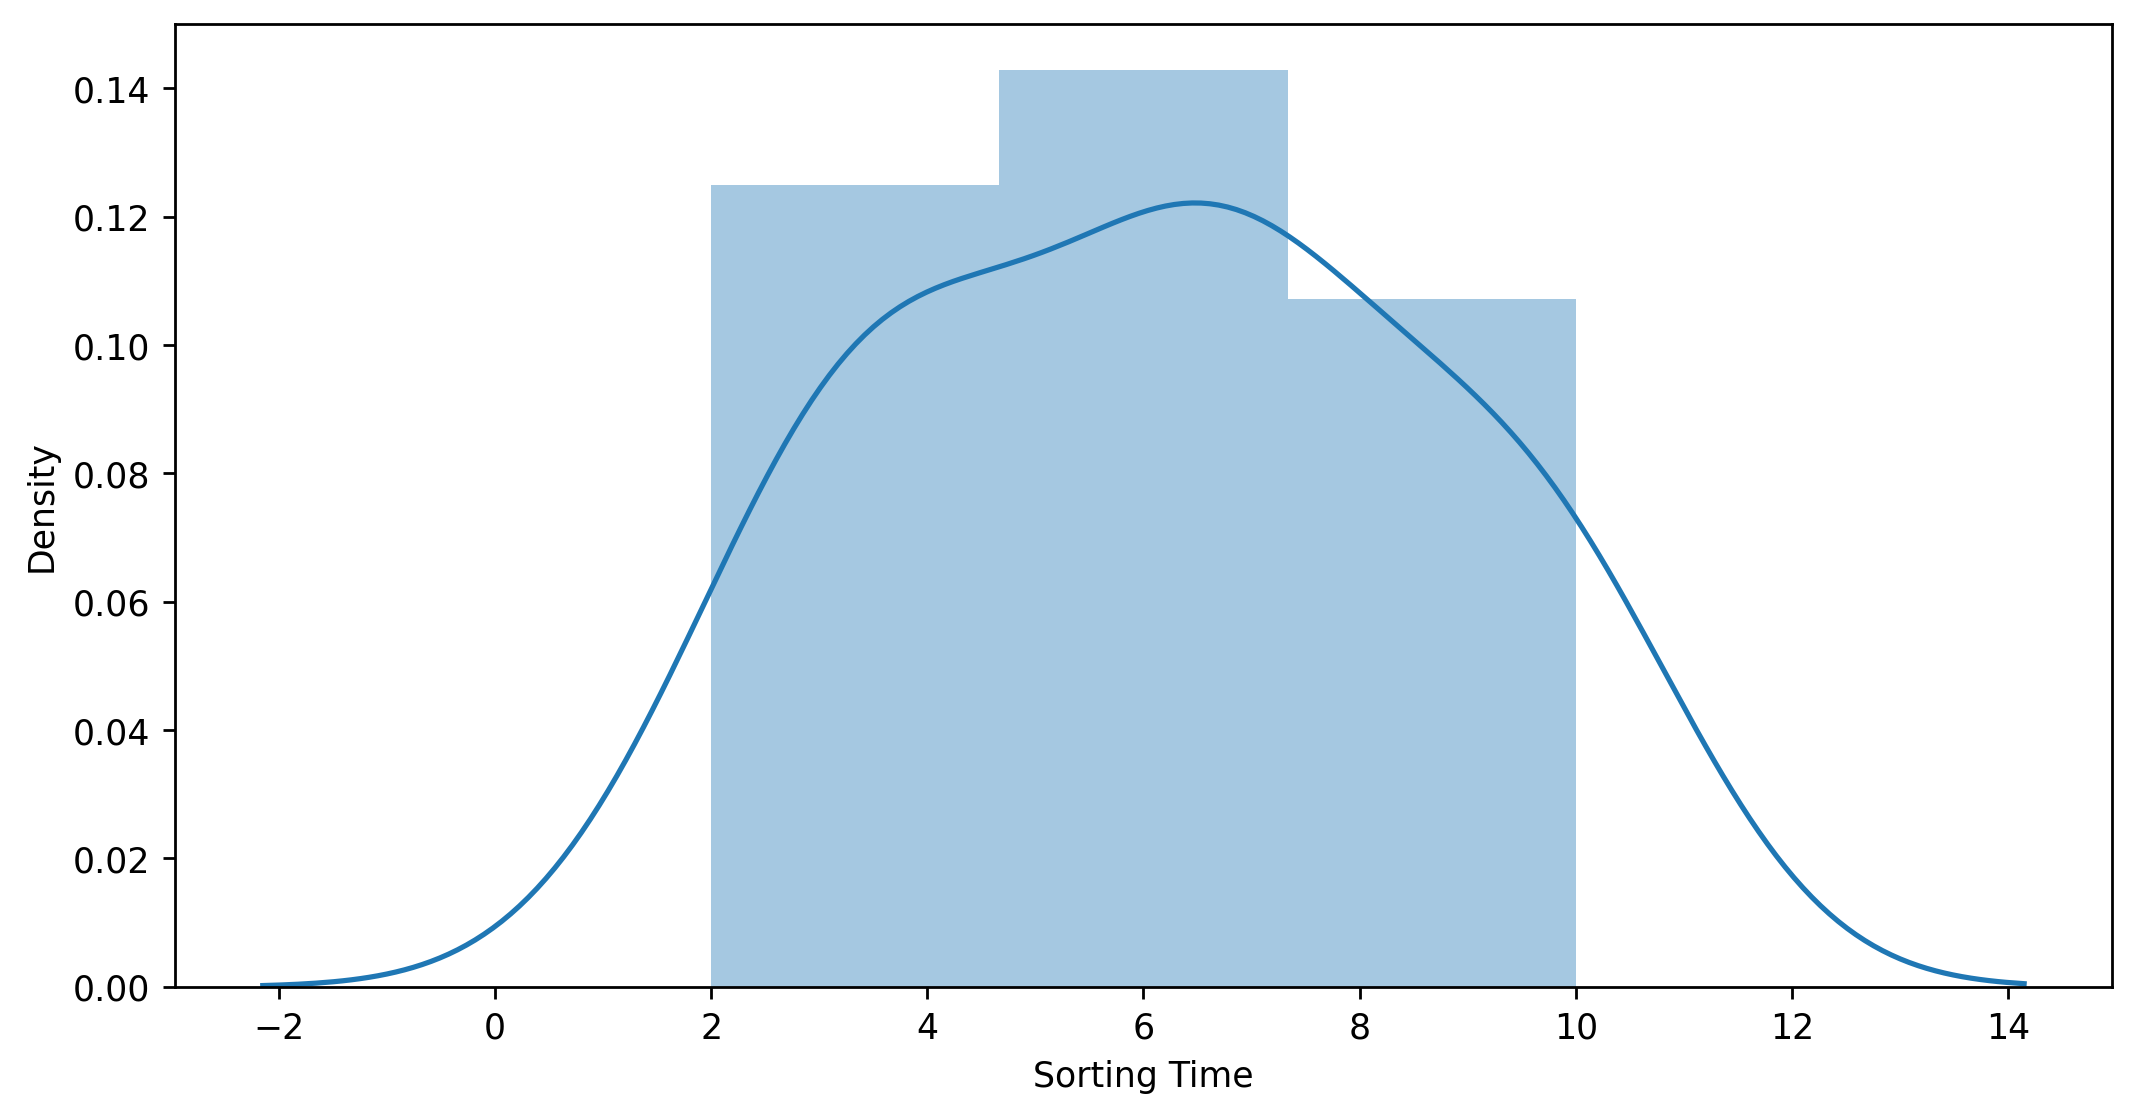

In [7]:
sns.distplot(df['Sorting Time'])

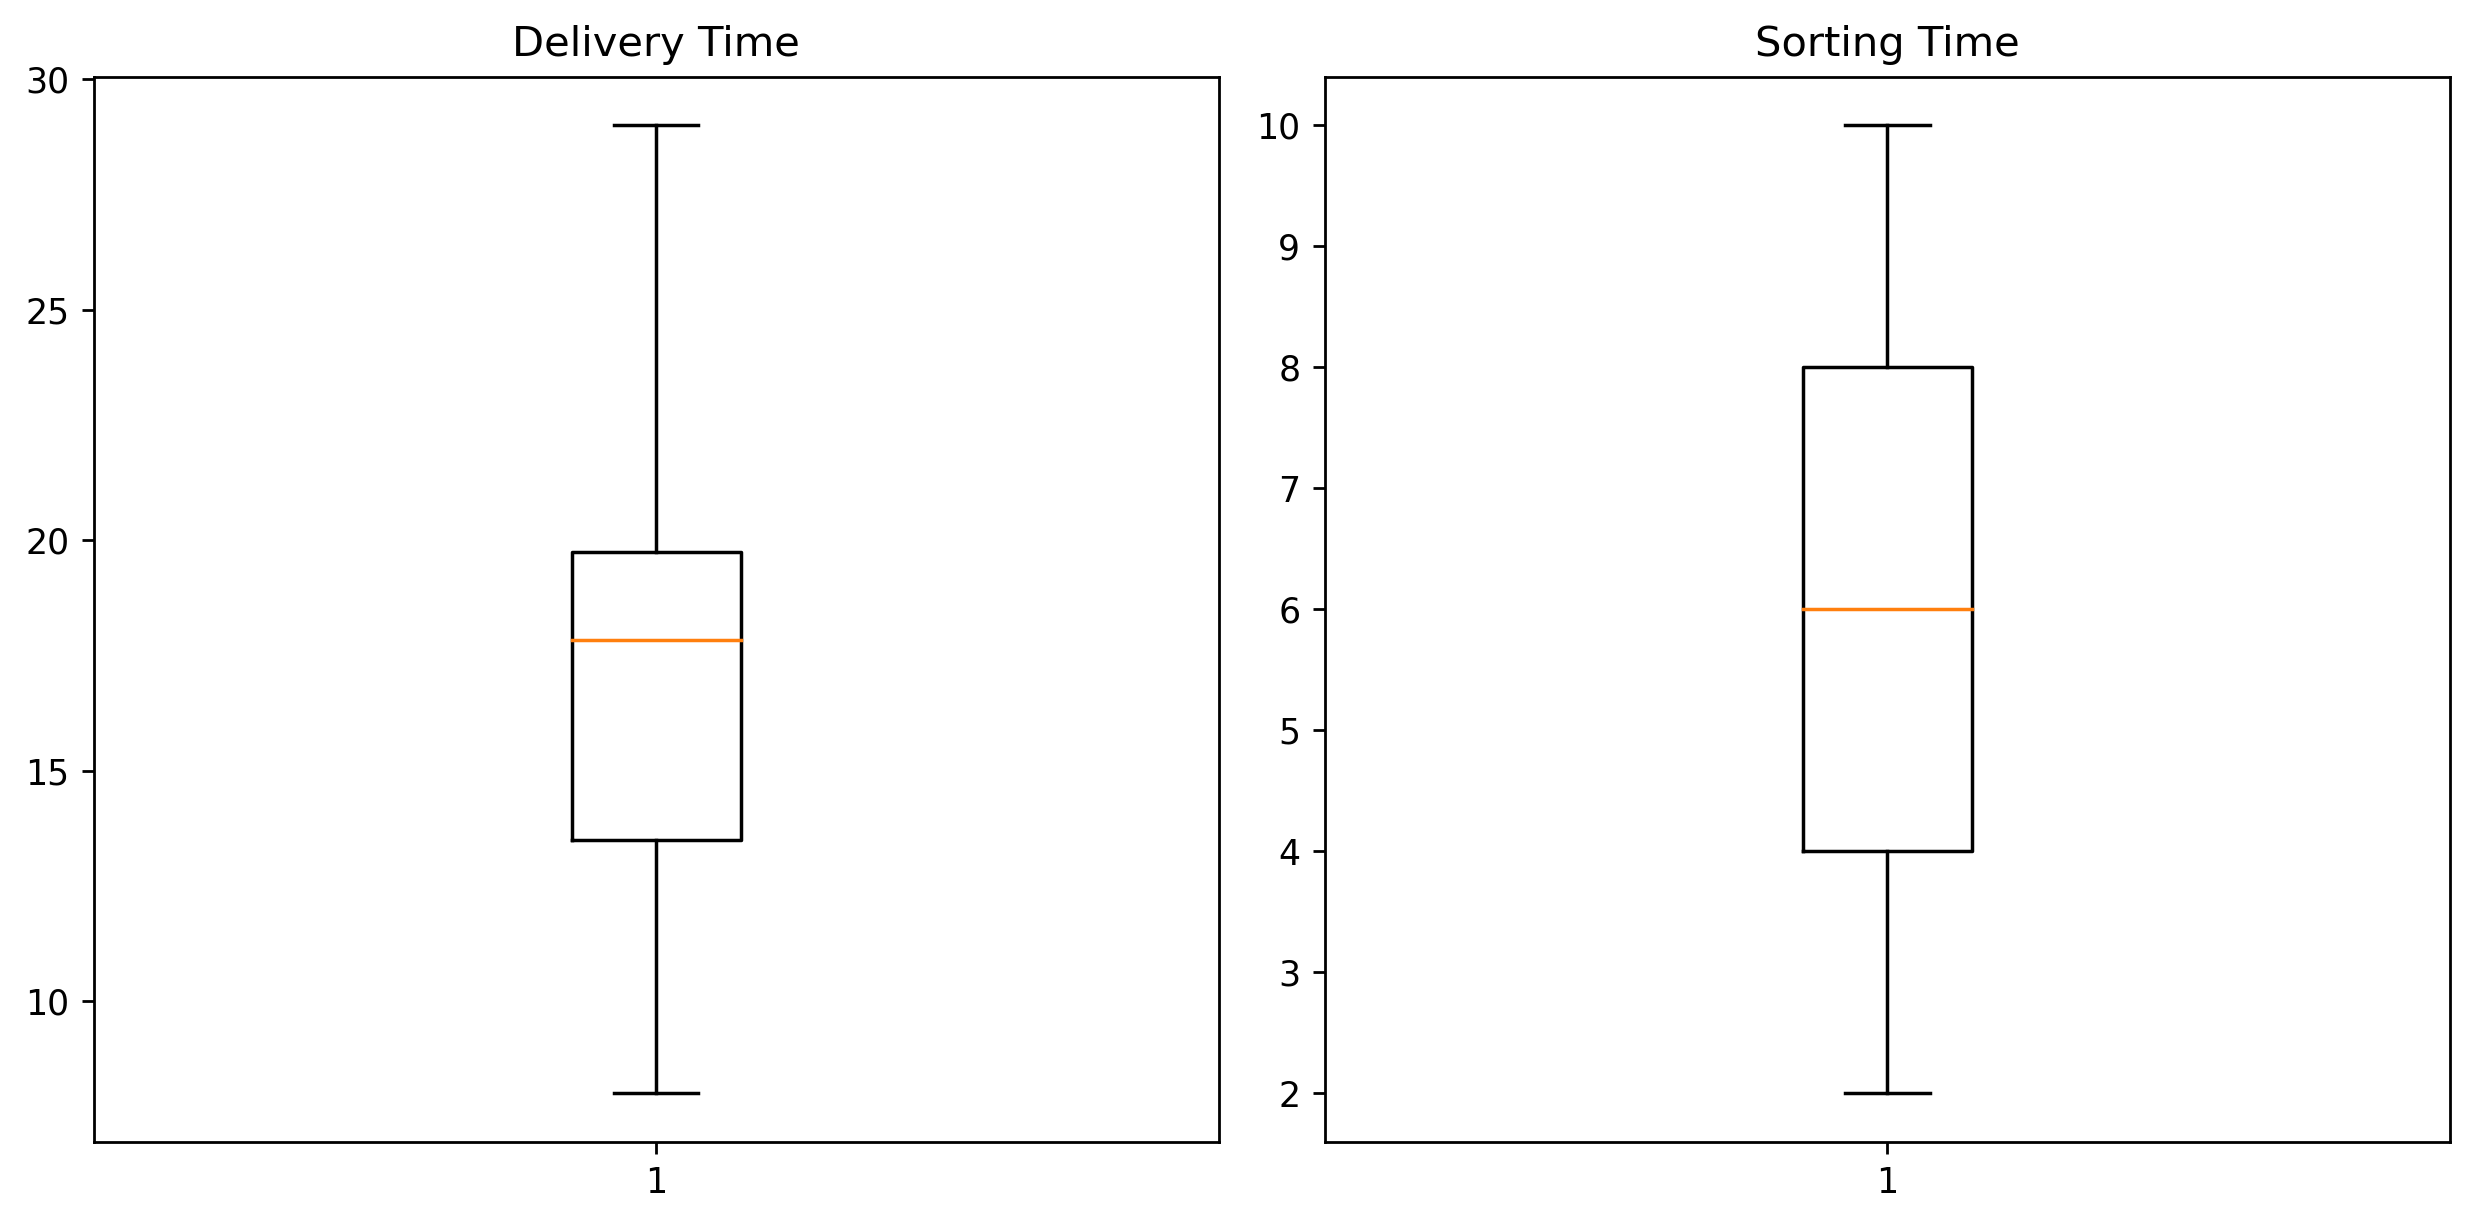

In [8]:
plt.subplot(1,2,1)
plt.boxplot(df['Delivery Time']);
plt.title('Delivery Time')
plt.subplot(1,2,2)
plt.boxplot(df['Sorting Time']);
plt.title('Sorting Time')
plt.tight_layout()

# EDA:

- No NA/missing values are present in the dataset
- No outliers are present
- Data types are correct
- No duplicate entries

In [9]:
# Feature Engineering

In [27]:
df = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'}, axis = 1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
# Correlation analysis

In [12]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


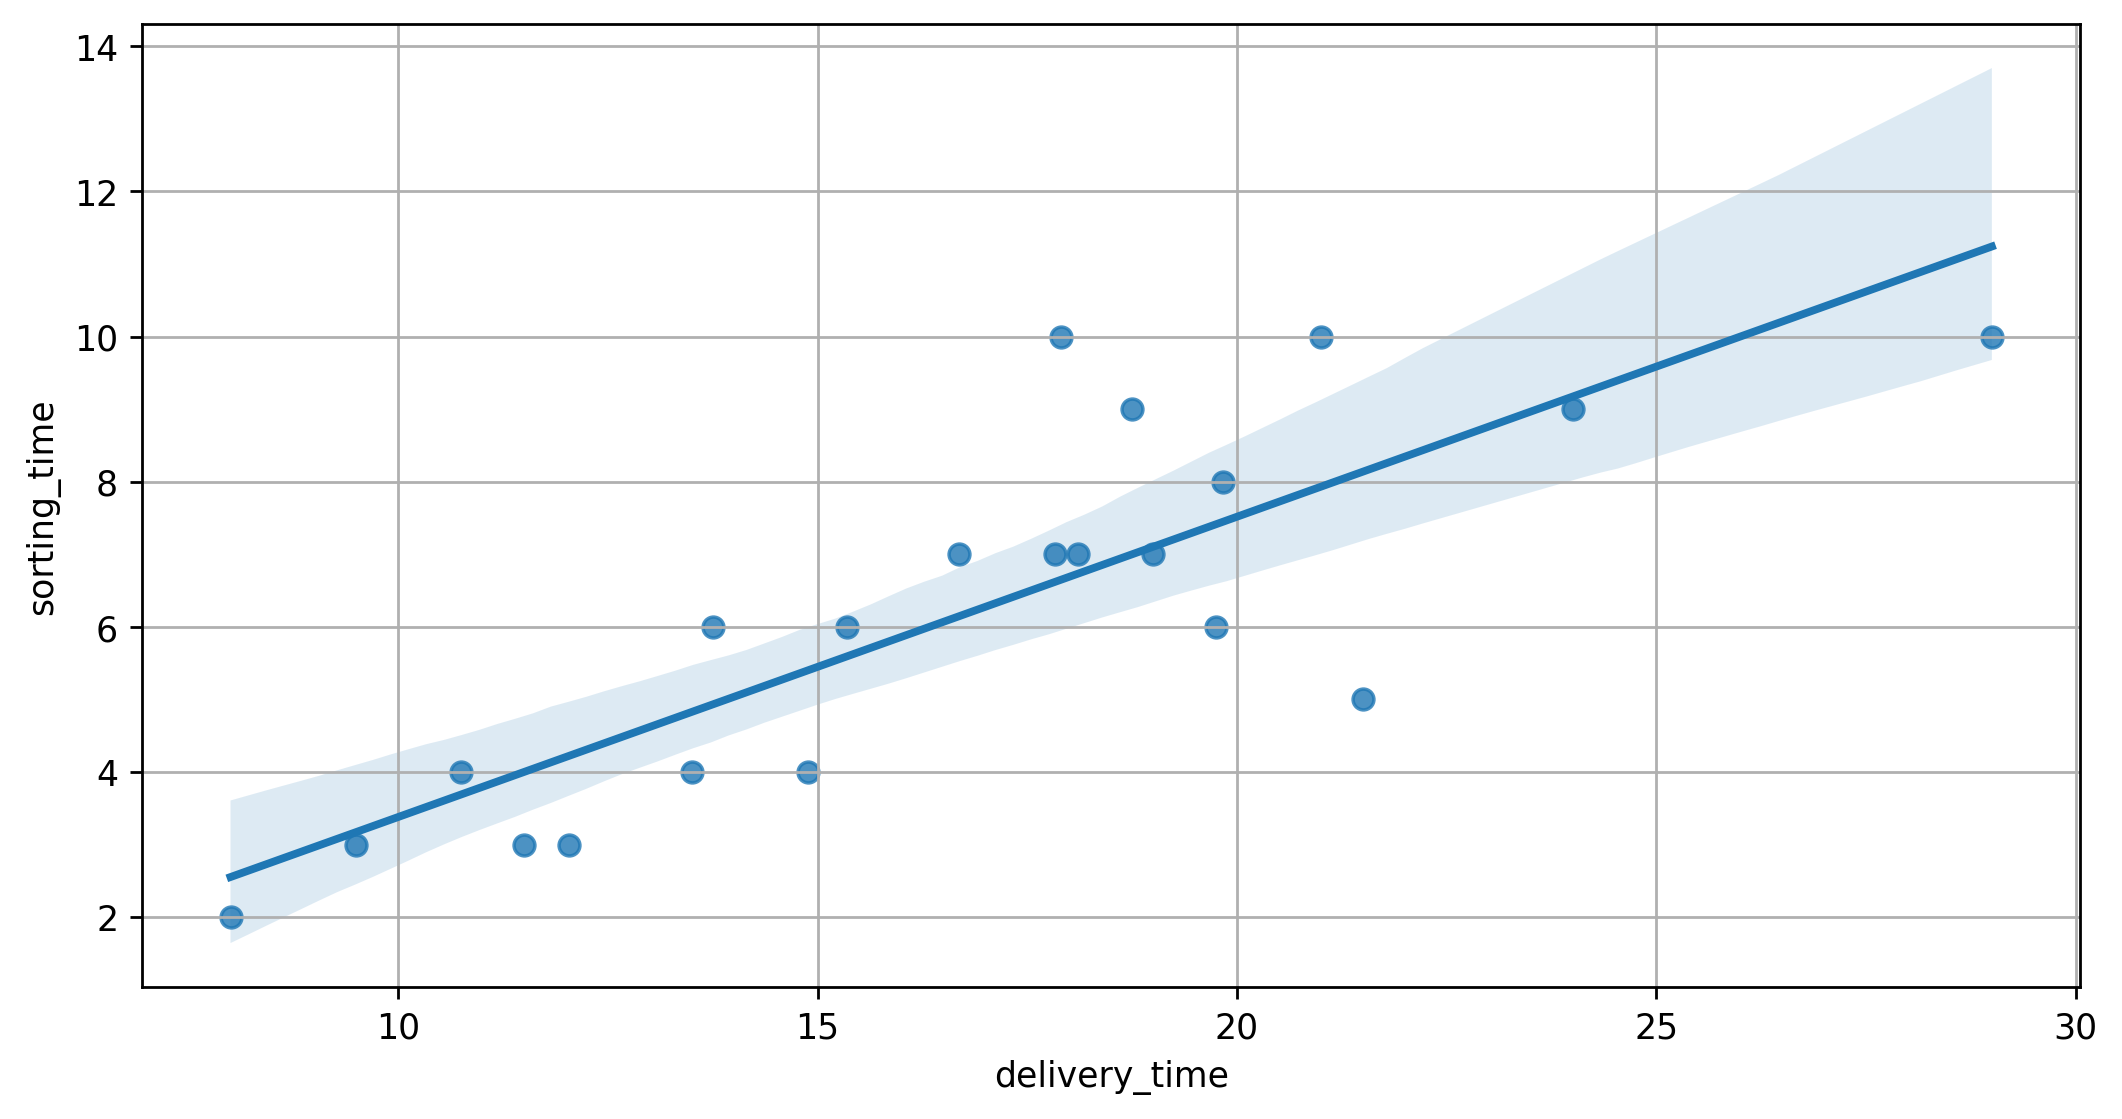

In [13]:
sns.regplot(x = df['delivery_time'], y = df['sorting_time'])
plt.grid()

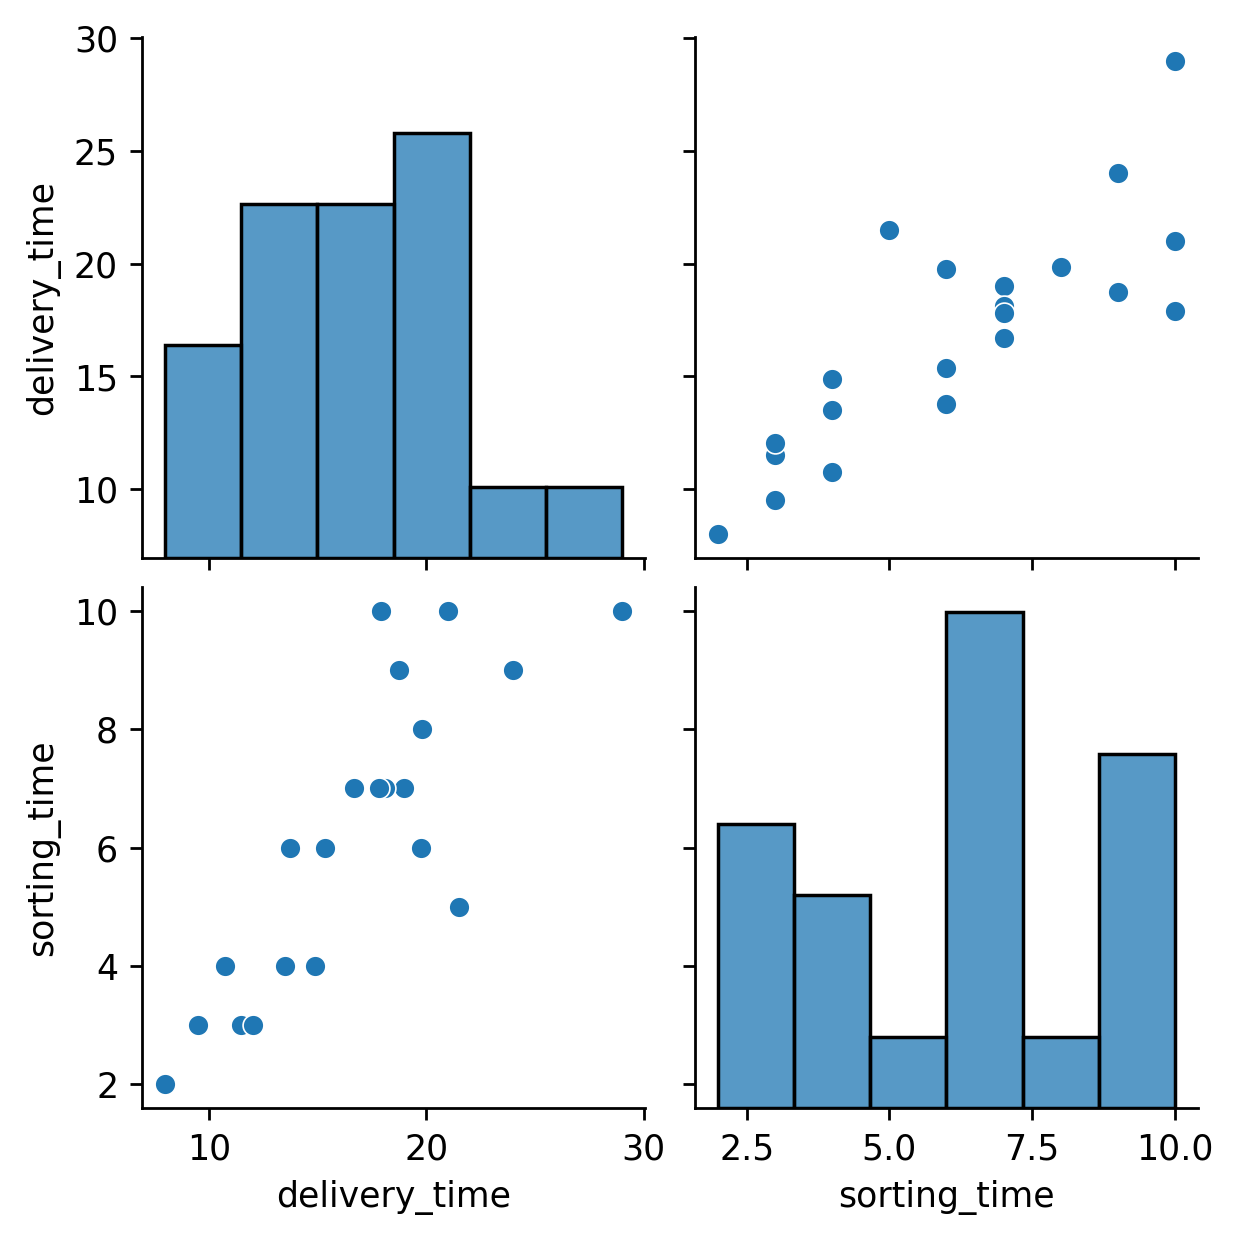

In [14]:
sns.pairplot(df);

In [15]:
# Model building(without Transformation)

import statsmodels.formula.api as smf

In [16]:
model = smf.ols('delivery_time ~ sorting_time', data = df).fit()

In [17]:
round(model.params, 3)

Intercept       6.583
sorting_time    1.649
dtype: float64

In [18]:
# Model testing

In [19]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [20]:
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [21]:
# R square value

In [22]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        11:58:21   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction of delivery time using sorting time

In [29]:
Predicted = pd.DataFrame()
Predicted['sorting_time'] = df['sorting_time']
Predicted['delivery_time'] = df['delivery_time']
Predicted['Predicted_delivery_time'] = model.predict(Predicted['sorting_time'])
Predicted

,sorting_time,delivery_time,Predicted_delivery_time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [31]:
df['sorting_time'].agg(['min','max'])

min     2
max    10
Name: sorting_time, dtype: int64

In [32]:
# Calculate prediction of delivery time for below Sorting time.
#Ex.- 4,6,8,3,7.

In [33]:
Delivery_pred = pd.DataFrame()
Delivery_pred['sorting_time'] = [4,6,8,3,7,5]
Delivery_pred['Predicted_delivery_time'] = round(model.predict(Delivery_pred['sorting_time']),3)
Delivery_pred

,sorting_time,Predicted_delivery_time
0,4,13.179
1,6,16.477
2,8,19.775
3,3,11.530
4,7,18.126
5,5,14.828


**Here values of R-squared and Adj. R-squared are less, so we can use transformation on data to increase those values and get some more accuracy in predictions.**

# Transformations

**1) Square Root Transformation:**

  As we can see above our data is not normally distributed so we can applying square root               transformation on given data to get a normal distribution and remove skewness.

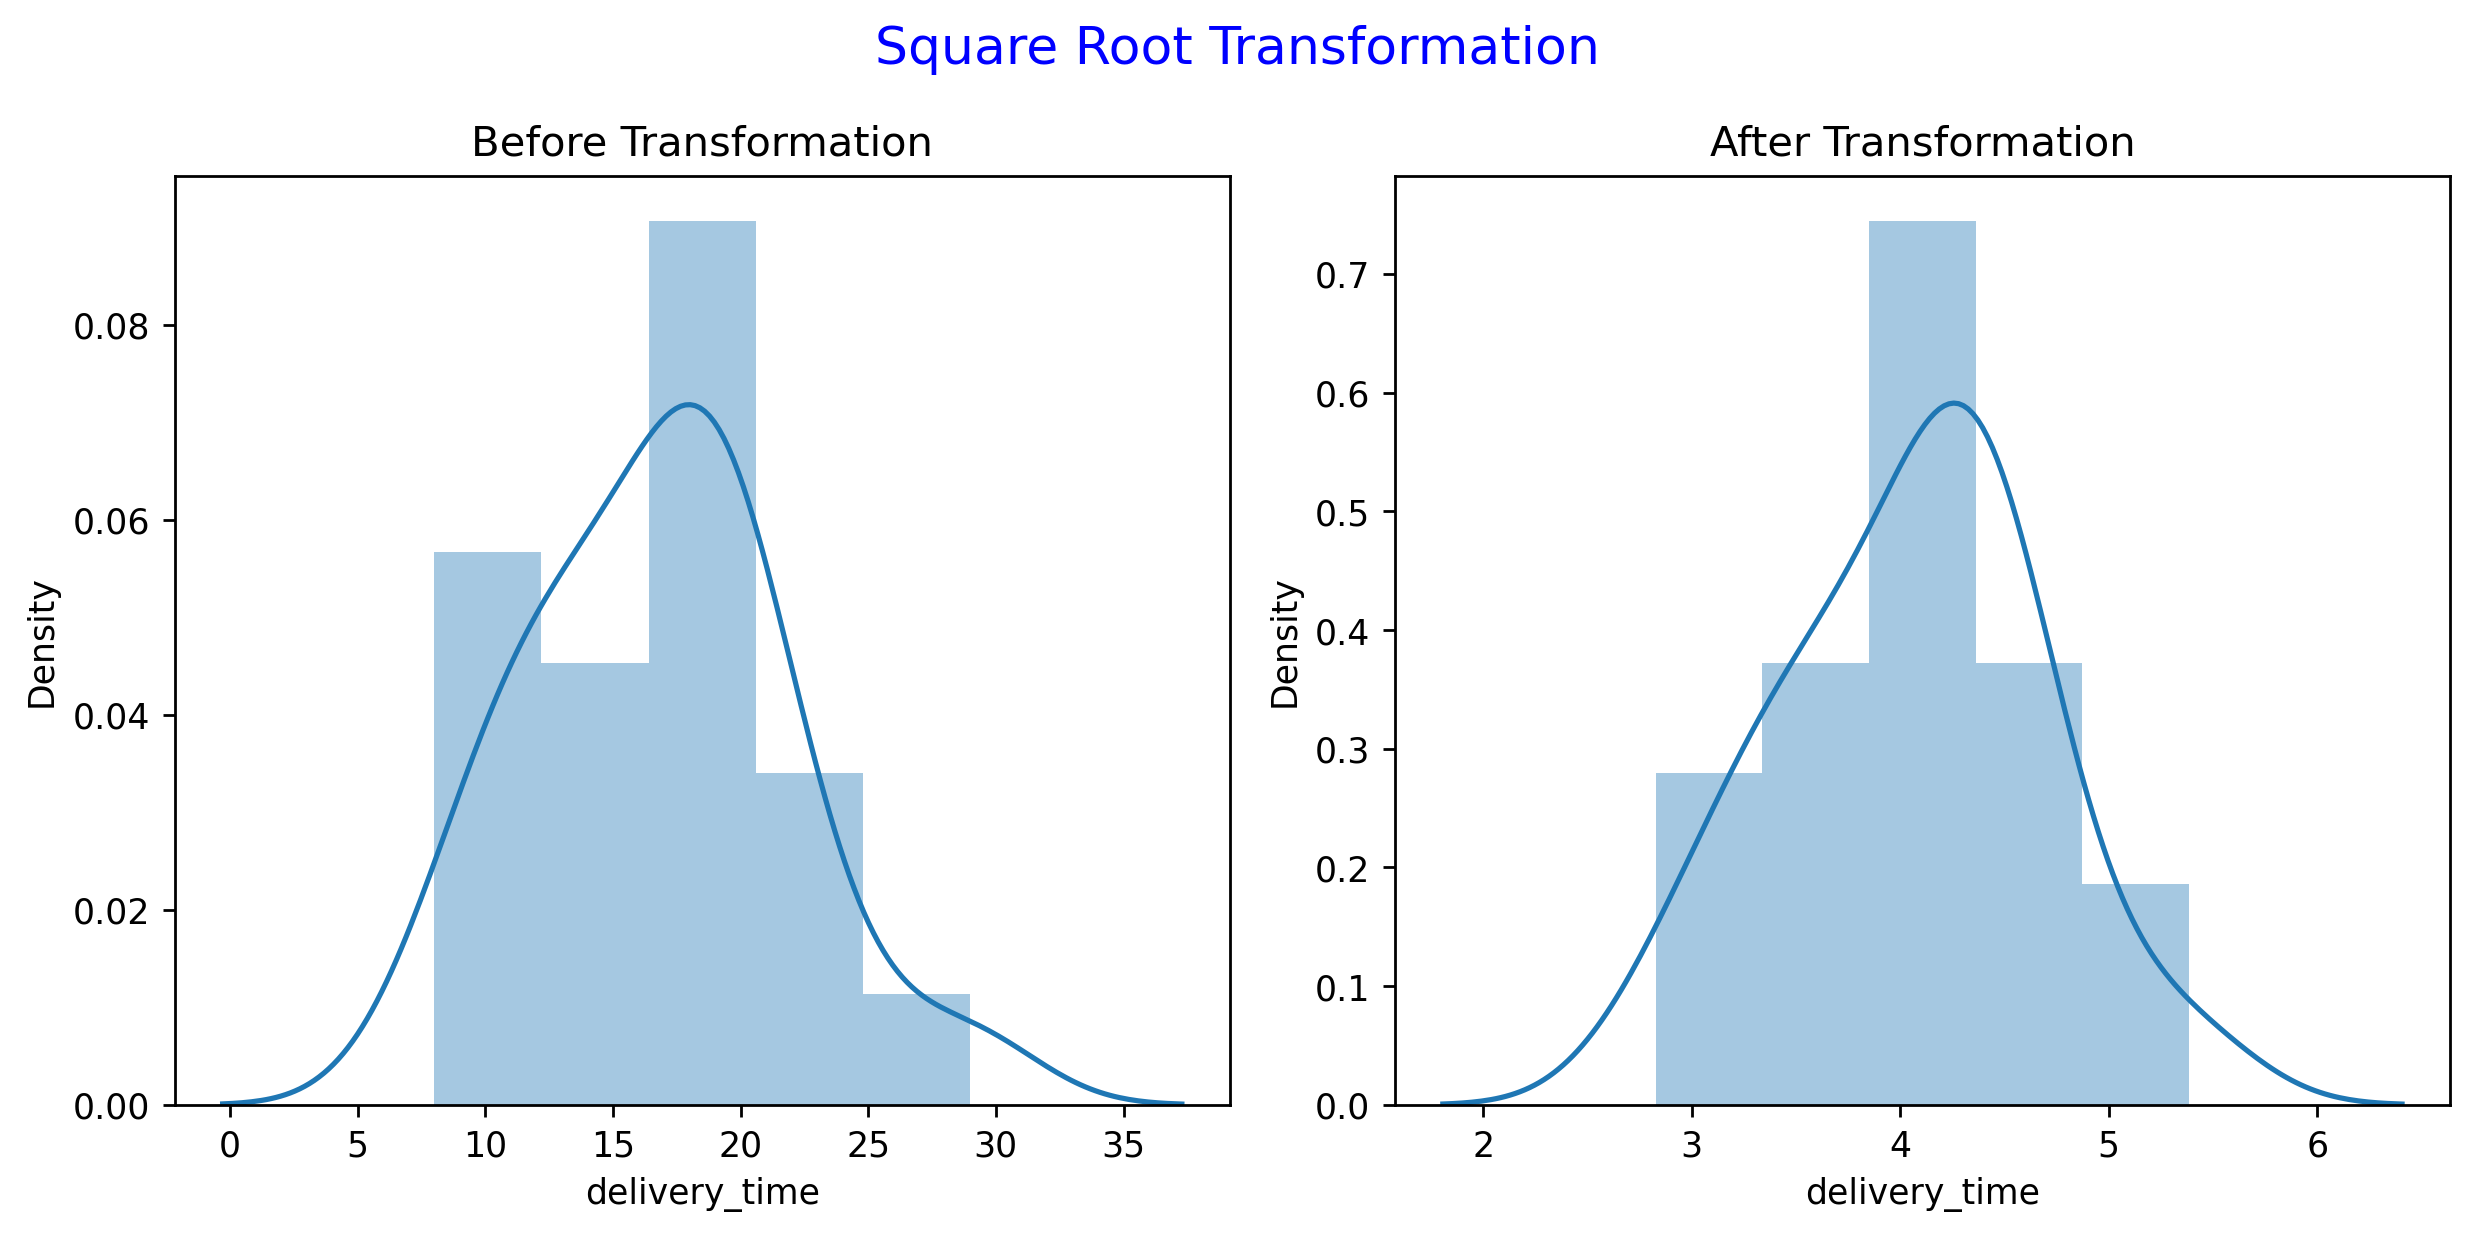

In [37]:
plt.subplots(1,2)
plt.suptitle('Square Root Transformation', color = 'b', size = 15)
plt.subplot(1,2,1)
plt.title('Before Transformation')
sns.distplot(df['delivery_time'])
plt.subplot(1,2,2)
plt.title('After Transformation')
sns.distplot(np.sqrt(df['delivery_time']))
plt.tight_layout()

**Model building using square root transformation**

In [38]:
model_1 = smf.ols("(np.sqrt(df['delivery_time']))~(np.sqrt(df['sorting_time']))", data = df).fit()

In [39]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.sqrt(df['delivery_time'])   R-squared:                       0.729
Model:                                      OLS   Adj. R-squared:                  0.715
Method:                           Least Squares   F-statistic:                     51.16
Date:                          Sun, 19 Feb 2023   Prob (F-statistic):           8.48e-07
Time:                                  14:29:33   Log-Likelihood:                -5.7320
No. Observations:                            21   AIC:                             15.46
Df Residuals:                                19   BIC:                             17.55
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(df['sorting_time'])     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2) Cube Root Transformation:**

  As we can see above our data is not normally distributed so we can applying sqrt transformation on     given data to get a normal distribution and remove skewness. 

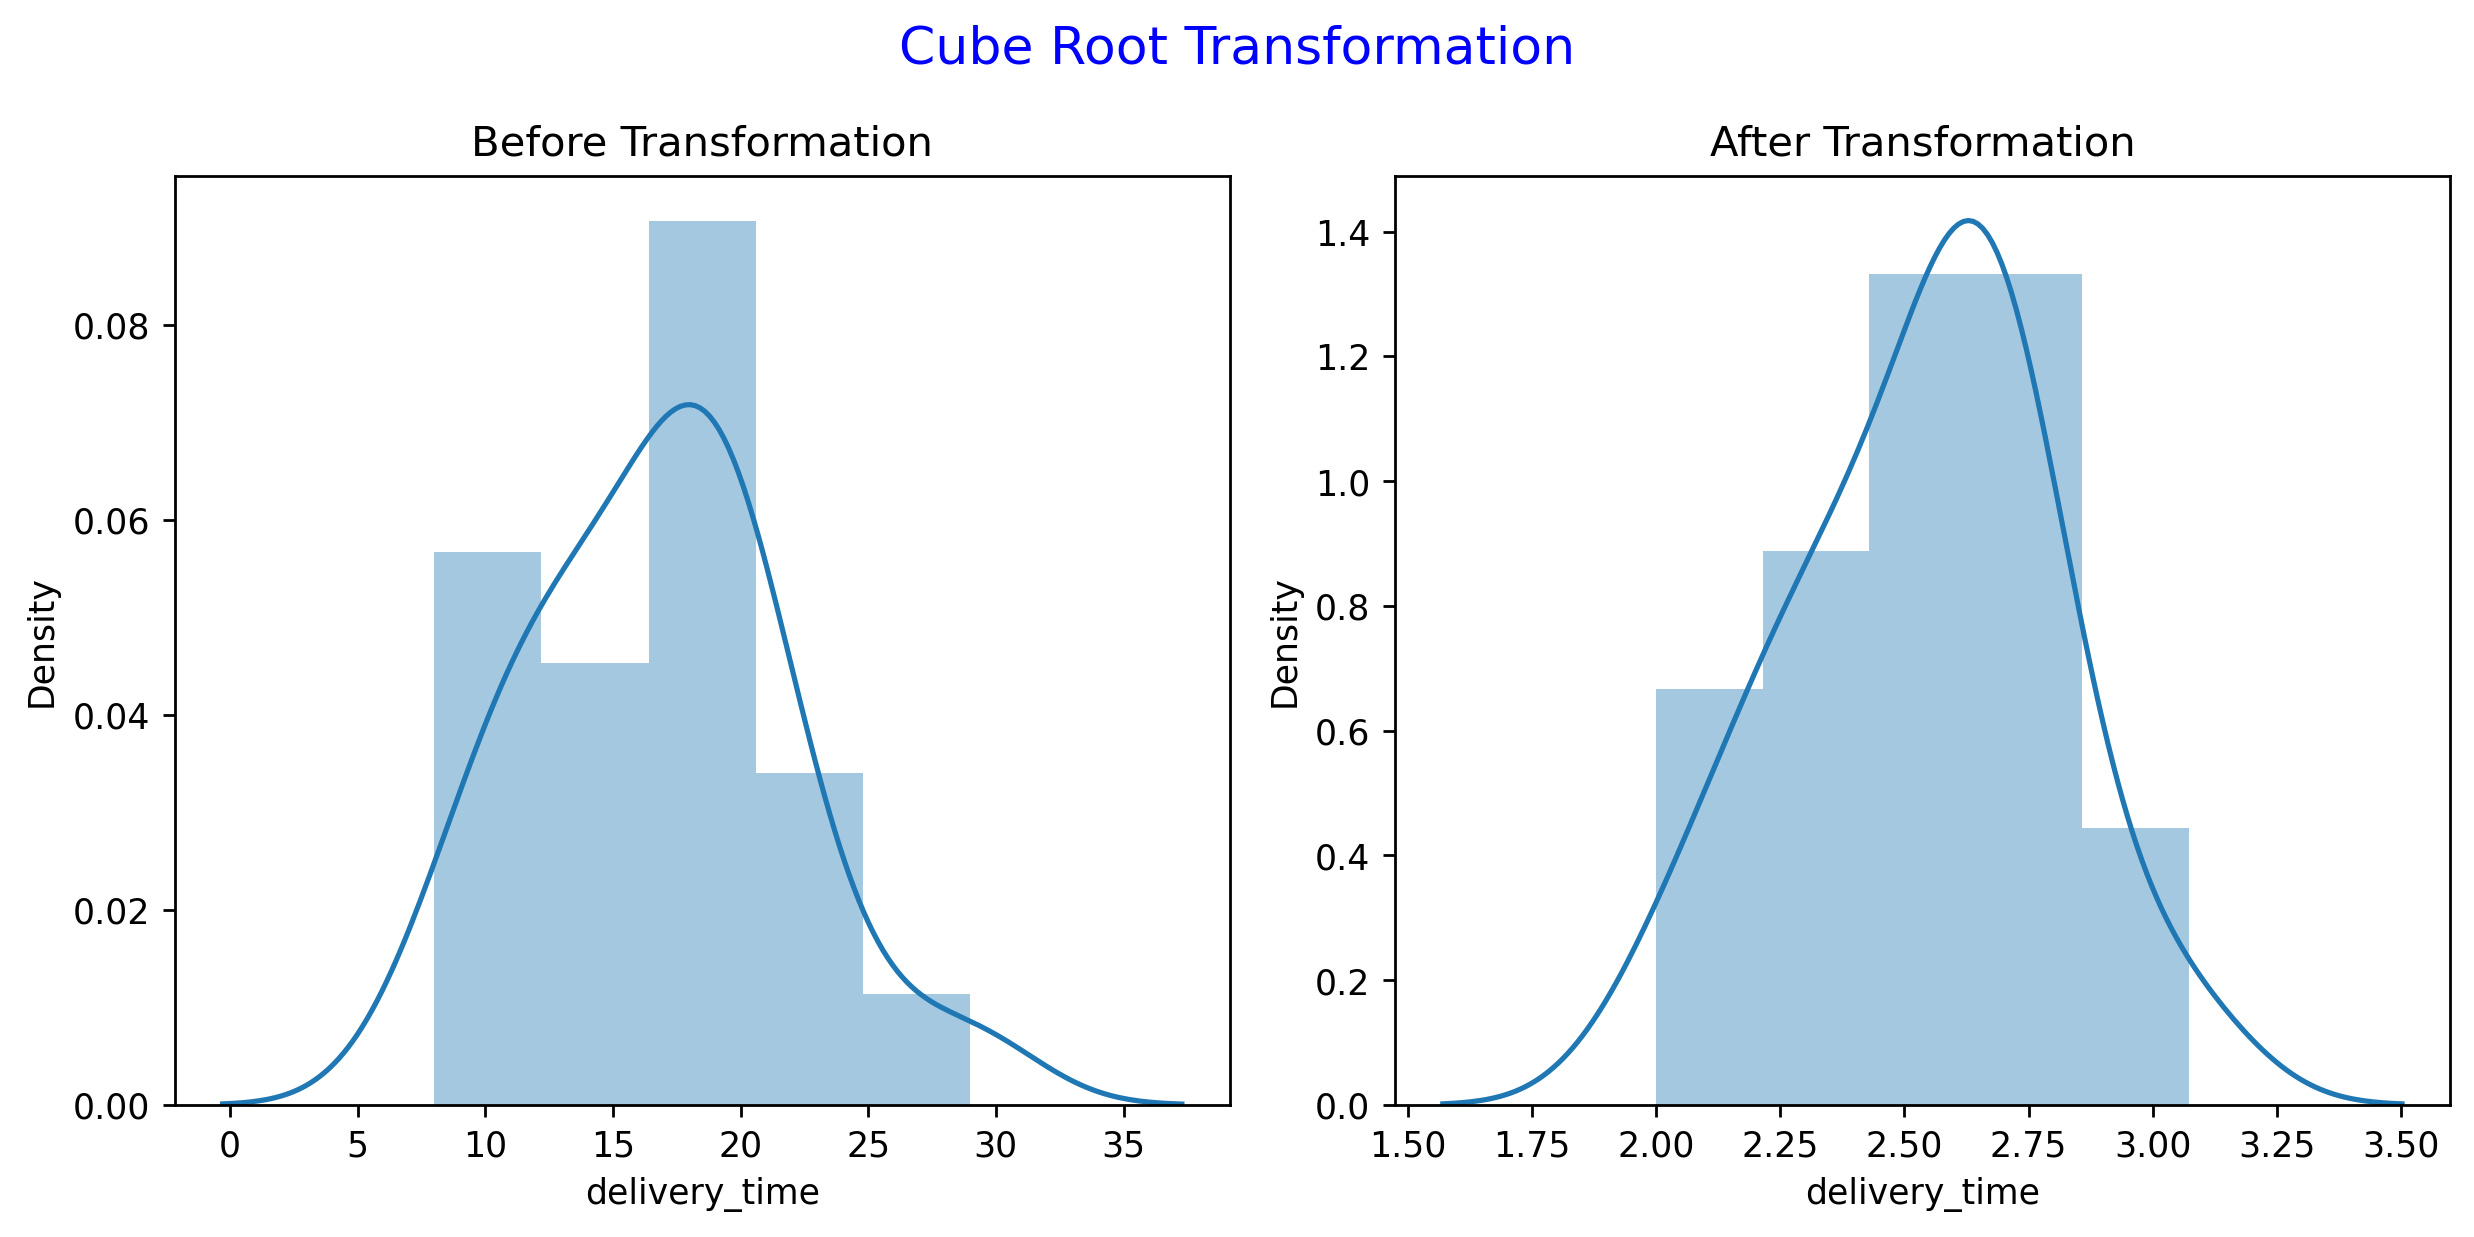

In [41]:
plt.subplots(1,2)
plt.suptitle('Cube Root Transformation', color='b', size = 15)
plt.subplot(1,2,1)
sns.distplot(df['delivery_time'])
plt.title('Before Transformation')
plt.subplot(1,2,2)
sns.distplot(np.cbrt(df['delivery_time']))
plt.title('After Transformation')
plt.tight_layout()

**Model building using cube root transformation**

In [42]:
model_2 = smf.ols("(np.cbrt(df['delivery_time']))~(np.cbrt(df['sorting_time']))", data = df).fit()

In [43]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.cbrt(df['delivery_time'])   R-squared:                       0.744
Model:                                      OLS   Adj. R-squared:                  0.731
Method:                           Least Squares   F-statistic:                     55.25
Date:                          Sun, 19 Feb 2023   Prob (F-statistic):           4.90e-07
Time:                                  14:34:48   Log-Likelihood:                 13.035
No. Observations:                            21   AIC:                            -22.07
Df Residuals:                                19   BIC:                            -19.98
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(df['sorting_time'])     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3) Log Transformation**

  As we can see above our data is not normally distributed so we can applying log transformation on     given data to get a normal distribution and remove skewness.

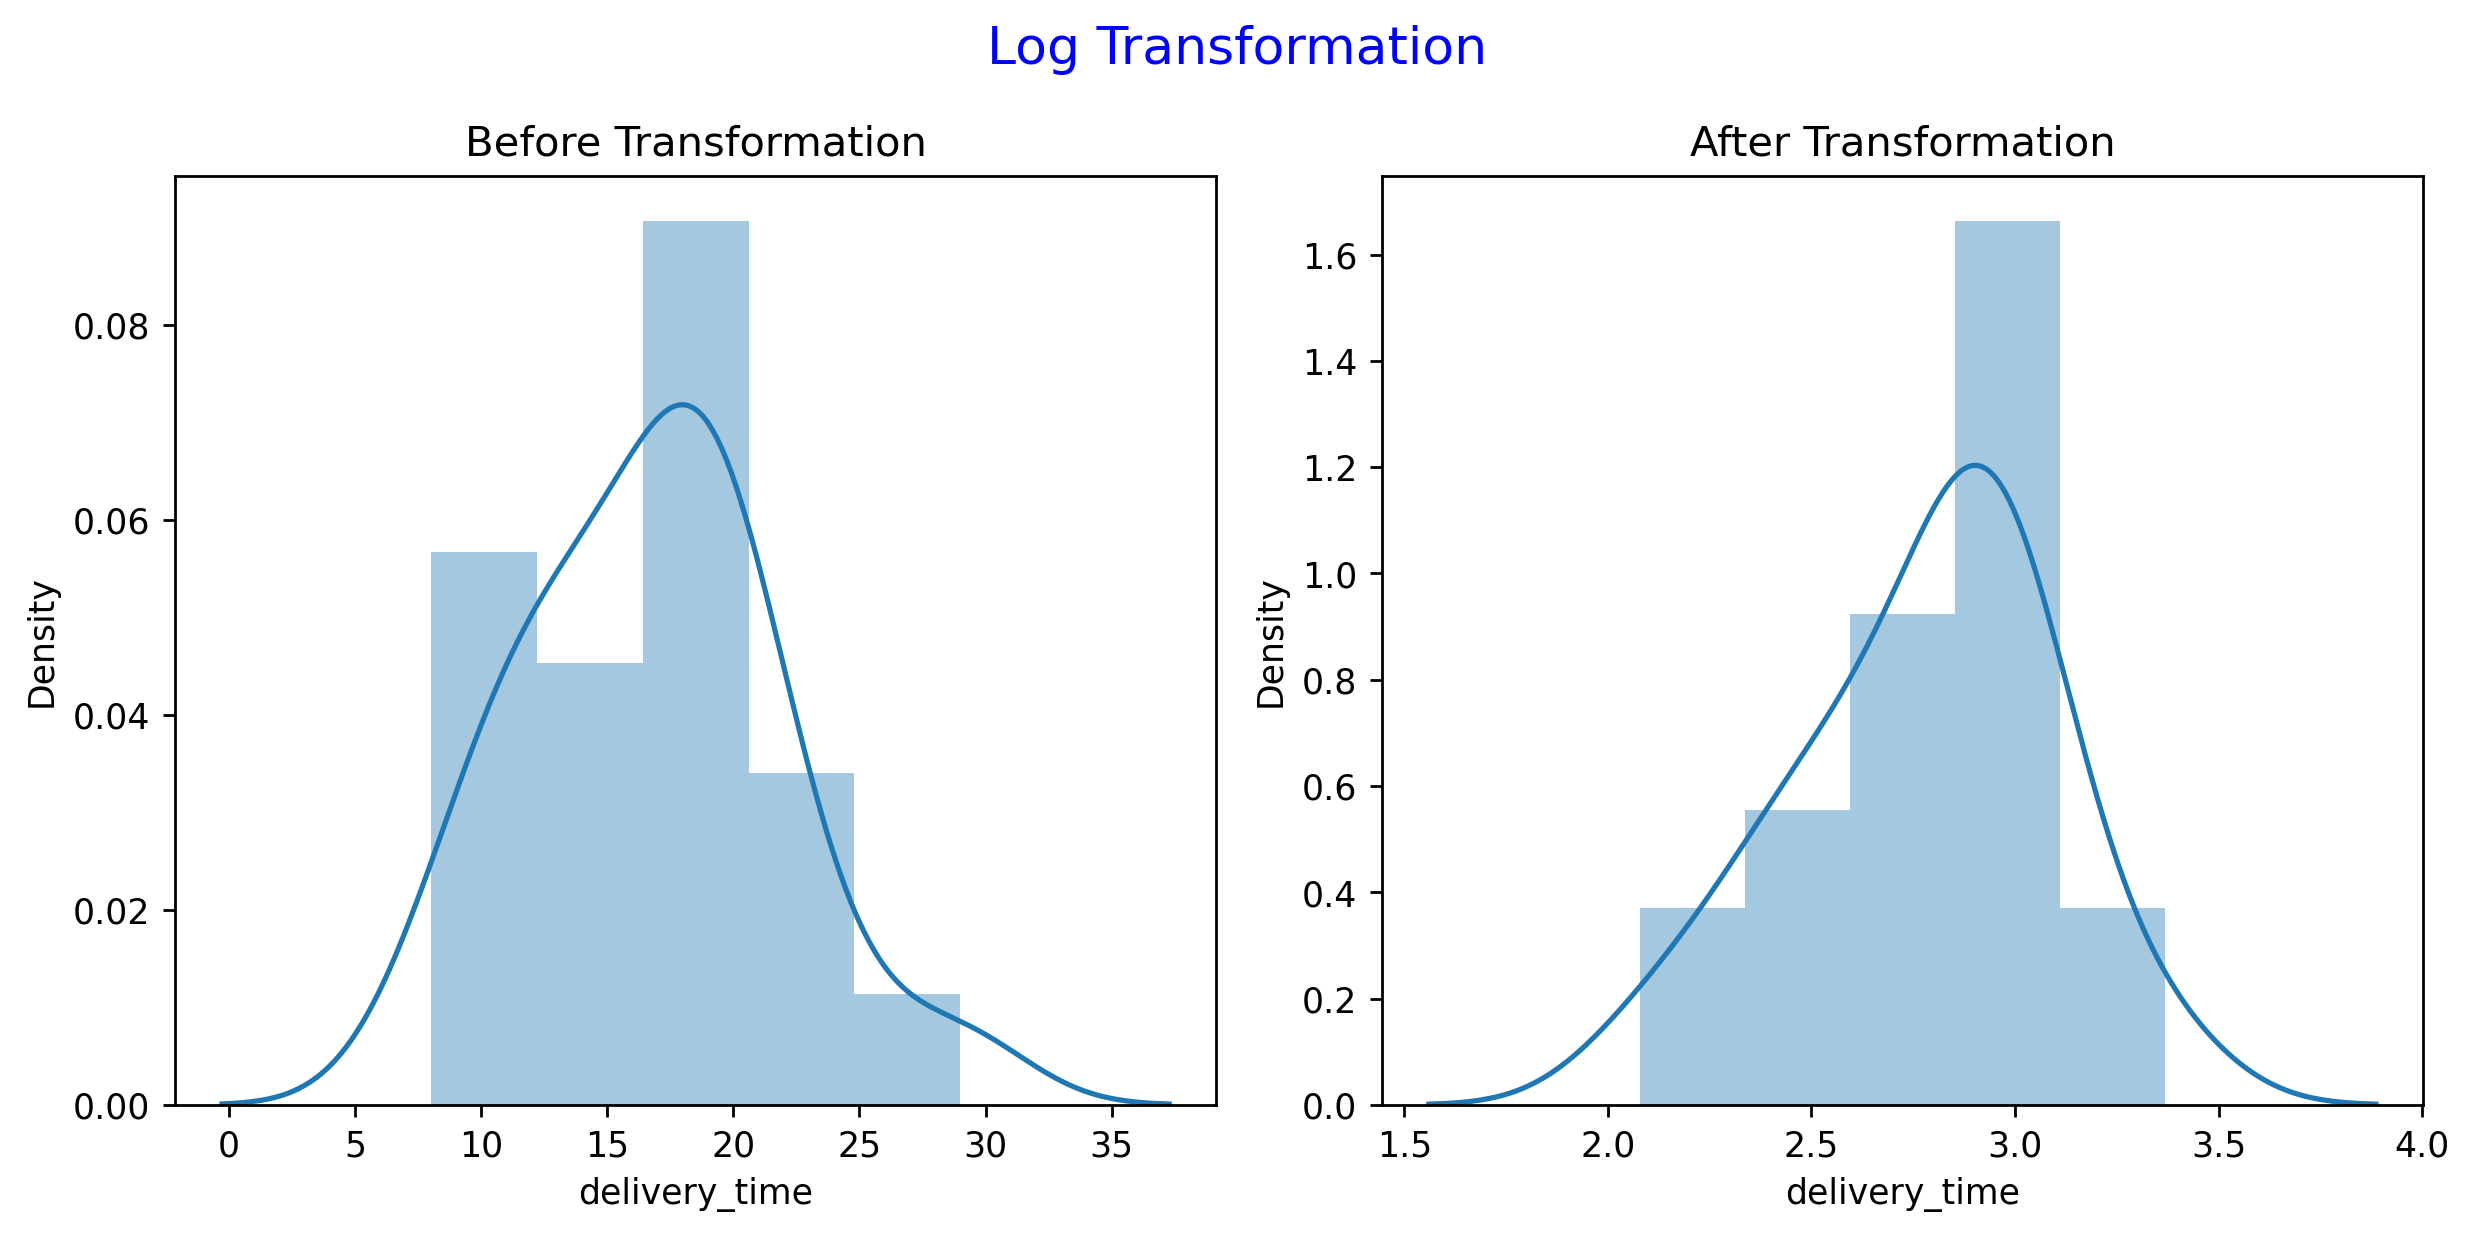

In [44]:
plt.subplots(1,2)
plt.suptitle('Log Transformation', color = 'b', size = 15)
plt.subplot(1,2,1)
plt.title('Before Transformation')
sns.distplot(df['delivery_time'])
plt.subplot(1,2,2)
plt.title('After Transformation')
sns.distplot(np.log(df['delivery_time']))
plt.tight_layout()

**Model building using log transformation**

In [46]:
model_3 = smf.ols("(np.log(df['delivery_time']))~(np.log(df['sorting_time']))", data = df).fit()

In [47]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log(df['delivery_time'])   R-squared:                       0.772
Model:                                     OLS   Adj. R-squared:                  0.760
Method:                          Least Squares   F-statistic:                     64.39
Date:                         Sun, 19 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                                 14:38:42   Log-Likelihood:                 10.291
No. Observations:                           21   AIC:                            -16.58
Df Residuals:                               19   BIC:                            -14.49
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(df['sorting_time'])     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model_3.params

Intercept                     1.741987
np.log(df['sorting_time'])    0.597522
dtype: float64

In [49]:
print('R-Squared = ', round(model_3.rsquared, 2))
print('Adjusted R-Squared = ', round(model_3.rsquared_adj,2))

R-Squared =  0.77
Adjusted R-Squared =  0.76


**As we can see that the values of R-Squared and Adjested R-Squared are higher in log transformation, so we can use log transformation for predictions.**

In [50]:
Predicted1 = pd.DataFrame()
Predicted1['sorting_time'] = df['sorting_time']
Predicted1['delivery_time'] = df['delivery_time']
Predicted1['Predicted_delivery_time'] = round(np.exp(model_3.predict(Predicted['sorting_time'])), 2)
Predicted1

,sorting_time,delivery_time,Predicted_delivery_time
0,10,21.00,22.60
1,4,13.50,13.07
2,6,19.75,16.65
3,9,24.00,21.22
4,10,29.00,22.60
5,6,15.35,16.65
6,7,19.00,18.26
7,3,9.50,11.01
8,10,17.90,22.60
9,9,18.75,21.22


In [51]:
# Calculate prediction of delivery time for below Sorting time(Using Log Transformation).
#Ex.- 4,6,8,3,7,5.

In [52]:
Predicted2 = pd.DataFrame()
Predicted2['sorting_time'] = [4,6,8,3,7,5]
Predicted2['delivery_time'] = [13.50,15.35,19.83,12.03,17.83,21.50]
Predicted2

,sorting_time,delivery_time
0,4,13.50
1,6,15.35
2,8,19.83
3,3,12.03
4,7,17.83
5,5,21.50


In [53]:
model_4 = smf.ols("(np.log(Predicted2['delivery_time']))~(np.log(Predicted2['sorting_time']))", data = Predicted2).fit()

In [54]:
Predicted2['Predicted_delivery_time'] = round(np.exp(model_4.predict(Predicted2['sorting_time'])), 2)
Predicted2

,sorting_time,delivery_time,Predicted_delivery_time
0,4,13.50,14.44
1,6,15.35,17.42
2,8,19.83,19.89
3,3,12.03,12.65
4,7,17.83,18.70
5,5,21.50,16.01
